In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
import os

# Định nghĩa các tham số
img_height, img_width = 256, 256
batch_size = 64
num_classes = 10  # Dataset có 11 loại trái cây

# Đường dẫn thư mục đã chia sẵn train/valid
train_dir = "data/train"
valid_dir = "data/valid"

# Data Augmentation (Chỉ áp dụng cho tập train)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Chỉ rescale cho tập validation
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

class_labels = list(train_generator.class_indices.keys())  # Lưu lại nhãn để sử dụng khi dự đoán

# Xây dựng mô hình CNN cải tiến
model = Sequential([
    Input(shape=(img_height, img_width, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),  # Thay vì Flatten
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Found 13084 images belonging to 10 classes.
Found 1687 images belonging to 10 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595,914 (2.27 MB)

 Trainable params: 593,418 (2.26 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [2]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_counts = train_generator.classes  # Lấy số lượng ảnh của từng lớp
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weight_dict)

{0: 0.5622690159003008, 1: 1.8273743016759776, 2: 1.8853025936599423, 3: 1.107874682472481, 4: 0.8239294710327456, 5: 0.6299470389985556, 6: 1.028616352201258, 7: 2.4007339449541285, 8: 0.7751184834123223, 9: 1.3136546184738955}


In [3]:
# Huấn luyện mô hình
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weight_dict,
    verbose=1
)

# Lưu mô hình sau khi train
model.save("fruit_classifier_cnn.keras")

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.4538 - loss: 1.9593 - val_accuracy: 0.1257 - val_loss: 6.0070
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 643s 3s/step - accuracy: 0.7176 - loss: 0.8989 - val_accuracy: 0.2081 - val_loss: 4.0880
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 650s 3s/step - accuracy: 0.7700 - loss: 0.7062 - val_accuracy: 0.5317 - val_loss: 1.4567
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.8066 - loss: 0.5797 - val_accuracy: 0.7688 - val_loss: 0.8119
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 679s 3s/step - accuracy: 0.8269 - loss: 0.5076 - val_accuracy: 0.8394 - val_loss: 0.5037
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.8555 - loss: 0.4228 - val_accuracy: 0.7493 - val_loss: 0.7774
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 641s 3s/step - accuracy: 0.8547 - loss: 0.4312 - val_accuracy: 0.7582 - val_loss: 0.9166
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.8756 - loss: 0.3579 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


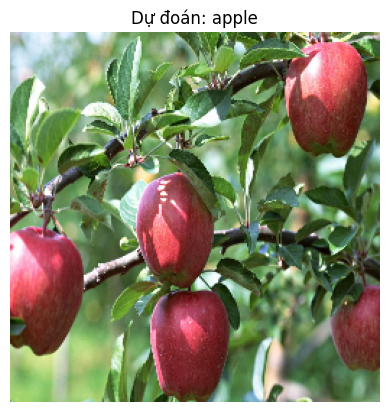

Ảnh: fruit_apple_apple-tree_wallpaper_ea60142_png.rf.e5bc2a376b04383ee35deac9deef8d77.jpg
Dự đoán: apple


In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Hàm dự đoán với hình ảnh ngẫu nhiên
def predict_random_image(test_dir="data/test/apple/images"):
    model = load_model("fruit_classifier_cnn.keras")

    # Lọc danh sách file ảnh
    image_files = [f for f in os.listdir(test_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print("Không tìm thấy ảnh trong thư mục test.")
        return

    image_name = random.choice(image_files)
    image_path = os.path.join(test_dir, image_name)

    # Load và tiền xử lý ảnh
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_label = class_labels[class_index]

    # Hiển thị ảnh và kết quả
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Dự đoán: {predicted_label}")
    plt.show()

    print(f"Ảnh: {image_name}")
    print(f"Dự đoán: {predicted_label}")

# Gọi thử nghiệm với ảnh ngẫu nhiên
predict_random_image()
